# ÁRBOLES DE DECISIÓN 

### Cargamos Libreria de Arbol

In [3]:
# #? Cargamos las librerias
from sklearn import tree 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Cargamos los datos desde un archivo .CSV

In [25]:
datos = pd.read_excel("../dataset/golf.xlsx")
# Tamaño del dataset
datos.shape
# mostrar algunos datos
datos

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,78,False,yes
3,rain,70,96,False,yes
4,rain,68,80,False,yes
5,rain,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rain,75,80,False,yes


In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     int64 
 2   Humidity     14 non-null     int64 
 3   Wind         14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 594.0+ bytes


In [13]:
# Cuantos Ejemplos existen 
datos.Outlook.value_counts()

Outlook
sunny       5
rain        5
overcast    4
Name: count, dtype: int64

In [14]:
datos.Temperature.max()

85

In [16]:
datos.Temperature.mean()

73.57142857142857

In [15]:
datos.Temperature.min()

64

In [17]:
datos.Humidity.mean()

80.28571428571429

In [19]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,14.0,73.571429,6.571667,64.0,69.25,72.0,78.75,85.0
Humidity,14.0,80.285714,9.840486,65.0,71.25,80.0,88.75,96.0


### Transformamos los valores nominales a numéricos 

In [26]:
atributos = list(datos.columns)

for atri in atributos:
    if atri == 'Outlook':
        datos[atri] = datos[atri].map({'sunny':0, 'overcast':1, 'rain':2})
    elif atri == 'Play':
        datos[atri] = datos[atri].map({'yes':1, 'no':0})

In [27]:
datos

,Outlook,Temperature,Humidity,Wind,Play
0,0,85,85,False,0
1,0,80,90,True,0
2,1,83,78,False,1
3,2,70,96,False,1
4,2,68,80,False,1
5,2,65,70,True,0
6,1,64,65,True,1
7,0,72,95,False,0
8,0,69,70,False,1
9,2,75,80,False,1


#### Variables dependientes e independientes

In [28]:
# Variables Independientes
columnas = datos.columns
vi = [col for col in columnas if col != 'Play']
# vi = ['Edad', 'Experiencia', 'Calificacion', 'Pais']
x = datos[vi].values

# Variable dependiente

y = datos['Play']

In [29]:
vi

['Outlook', 'Temperature', 'Humidity', 'Wind']

### Generar el modelo de clasificacion

In [33]:
# Definimos una variable para el algoritmo de clasificación

clasificador = tree.DecisionTreeClassifier()

# Entrenar al algoritmo de Clasificación

clasificador.fit(x,y)

# Predicciones

predicciones = clasificador.predict([[2,68,80,False]])

if predicciones == 0:
    print('No voy a Juega')
else:
    print('Si voy a juega')

Si juega


### Graficar el Arbol de clasificacion

se utiliza la libreria Grapviz
* pip install pydotplus

<function matplotlib.pyplot.show(close=None, block=None)>

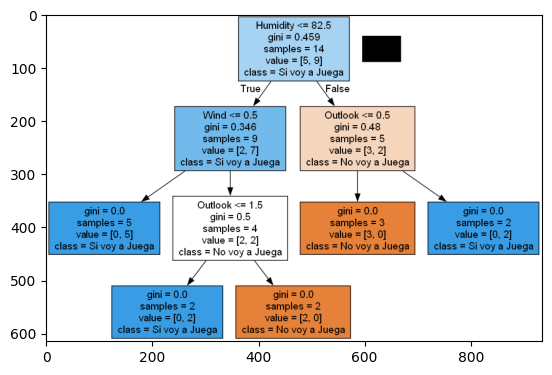

In [34]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

clase = ['No voy a Juega', 'Si voy a Juega'] 

datos = tree.export_graphviz(clasificador, 
                            class_names=clase,
                            feature_names=vi,
                            filled=True,
                            )
graph = pydotplus.graph_from_dot_data(datos)
graph.write_png('miarbol4.png')
imagen = pltimg.imread('miarbol4.png')
plt.imshow(imagen)
plt.show